In [2]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


In [3]:
from keras import datasets
import pandas as pd
import numpy as np

(xTrain, yTrain), (xTest, yTest) = datasets.cifar10.load_data()

names = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

# print(np.shape(xTrain))
# print(np.shape(xTrain[0]))

# # xTrain = np.reshape(xTrain, (50000, 1, 32, 32, 3))
# # xTest = np.reshape(xTest, (10000, 1, 32, 32, 3))

# print(np.shape(xTrain))
# print(np.shape(xTrain[0]))
# print(np.shape(xTrain[0][0]))

from keras.utils import to_categorical
from keras.utils import normalize

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain = xTrain/255.
xTest = xTest/255.

print(np.shape(xTrain))
print(np.shape(xTest))

print(np.shape(yTrain))
print(np.shape(yTest))

# print(xTrain[0])


Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


231
frog
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


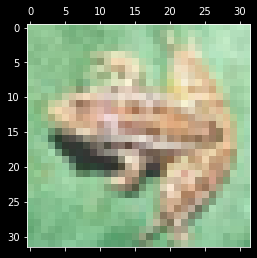

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
import random 
style.use(style.available[4])

x = random.randrange(0,10000)

print(x)
print(names[np.argmax(yTrain[x])])
print(yTrain[x])

plt.matshow(xTrain[x])

In [7]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.preprocessing.image import image

weightDecay = 1e-4

#model -- VGG-3 Blocks with dropouts
model = Sequential()
model.add(Conv2D(32, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay), input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='elu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))


In [8]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [9]:
# compile
from keras.optimizers import SGD
from keras.optimizers import adam

optimizer = SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15
)

trainGenerator = trainGen.flow(
    xTrain,
    yTrain,
    batch_size=64
)

testGen = ImageDataGenerator()

testGenerator = testGen.flow(
    xTest,
    yTest,
    batch_size=64
)

In [6]:
from keras.models import load_model

BATCH_SIZE = 64
EPOCHS = 50

model = load_model('./myModel-relu-ADAM-activation-125.h5')

optimizer = SGD(lr=0.0001,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    trainGenerator,
    steps_per_epoch= np.shape(xTrain)[0] // BATCH_SIZE,
    validation_data=testGenerator,
    validation_steps= np.shape(xTest)[0] // BATCH_SIZE,
    verbose=1,
    shuffle=True,
    epochs=EPOCHS
)

# history = model.fit(
#     xTrain,
#     yTrain,
#     batch_size=BATCH_SIZE,
#     epochs=EPOCHS,
#     verbose=1,
#     validation_data=(xTest,yTest),
#     shuffle=True,
# )

model.save('./myModel-999-(200).h5')

NameError: name 'SGD' is not defined

In [11]:
model = load_model('./myModel-relu-ADAM-activation-125.h5')
_, acc = model.evaluate(xTest, yTest, batch_size=BATCH_SIZE)
print(acc*100)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_19_1/convolution (defined at C:\Users\aryan\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_14333]

Function call stack:
keras_scratch_graph


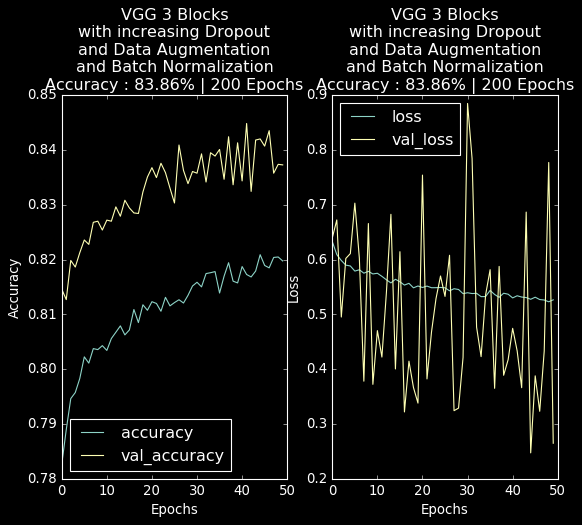

<Figure size 640x480 with 0 Axes>

In [340]:
y = history.epoch

plt.subplot(1,2,1)
plt.plot(y, history.history['accuracy'], label='accuracy')
plt.plot(y, history.history['val_accuracy'], label='val_accuracy')
plt.title('VGG 3 Blocks\nwith increasing Dropout\nand Data Augmentation\nand Batch Normalization\nAccuracy : 83.86% | 200 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(y, history.history['loss'], label='loss')
plt.plot(y, history.history['val_loss'], label='val_loss')
plt.title('VGG 3 Blocks\nwith increasing Dropout\nand Data Augmentation\nand Batch Normalization\nAccuracy : 83.86% | 200 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)

plt.show()
plt.savefig('model-992')